<a href="https://colab.research.google.com/github/aksanaboo/AntibioticsUsage/blob/main/AntibioticsUsage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [111]:
# data from 19th december 2019

In [94]:
!pip install vizro

In [95]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import vizro.plotly.express as px
from vizro import Vizro
import vizro.models as vm

In [96]:
#dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hospital Dataset.csv')

In [97]:
data.head()

,Age,Date of Data Entry,Gender,Diagnosis,Name of Drug,Dosage (gram),Route,Frequency,Duration (days),Indication
0,85,19/12/2019 14:41:49,Female,"ccf, hypertension, ida, ckd(stage 5), ?icm,",ceftriaxone,1,IV,BD,7,icm
1,87,19/12/2019 16:35:25,Female,"pad(lt u.l), be amputation,/post op, akt",ceftriaxone,1,IV,BD,1,post op
2,82,19/12/2019 15:48:49,Male,"type-2dm, ihd, col, copd, ht",ofloxacin,0.4,IV,BD,3,abd distension with leg swelling
3,82,19/12/2019 15:50:33,Male,"type-2 dm, ihd, col, copd, ht",cefipime,1,IV,BD,5,abd distension with leg swelling
4,82,19/12/2019 15:52:20,Male,"type-2 dm, ihd, col, copd, ht",azithromycin,0.5,Oral,OD,3,abd distension with leg swelling


In [98]:
data.shape

(833, 10)

In [99]:
data.columns

Index(['Age', 'Date of Data Entry', 'Gender', 'Diagnosis', 'Name of Drug',
       'Dosage (gram)', 'Route', 'Frequency', 'Duration (days)', 'Indication'],
      dtype='object')

The dataset focuses on the retrospective study of the usage of antibiotics and diseases under the title of antibiotics resistance. The dataset contains

- age and gender of the patient

- diagnosis of the patient

- Antibiotics used to treat patient

- Dosage of the antibiotics in grams

- Route of application of antibiotics

- Frequency of usage of antibiotics

- Duration of treatment using antibiotics in days

- Indiction of antibiotics

In [100]:
# checking for missing values
data.isnull().sum()

Age                   0
Date of Data Entry    0
Gender                0
Diagnosis             0
Name of Drug          0
Dosage (gram)         0
Route                 0
Frequency             0
Duration (days)       0
Indication            1
dtype: int64

In [101]:
data.dropna(inplace=True)

In [102]:
data.duplicated().sum()

7

In [103]:
data.drop_duplicates(inplace=True)

In [104]:
#Antibiotics used overview
top_10_drug = data['Name of Drug'].value_counts().reset_index()[:10]

In [105]:
top_10_drug.rename(columns={'index':'Drug','Name of Drug':'Count'},inplace=True)

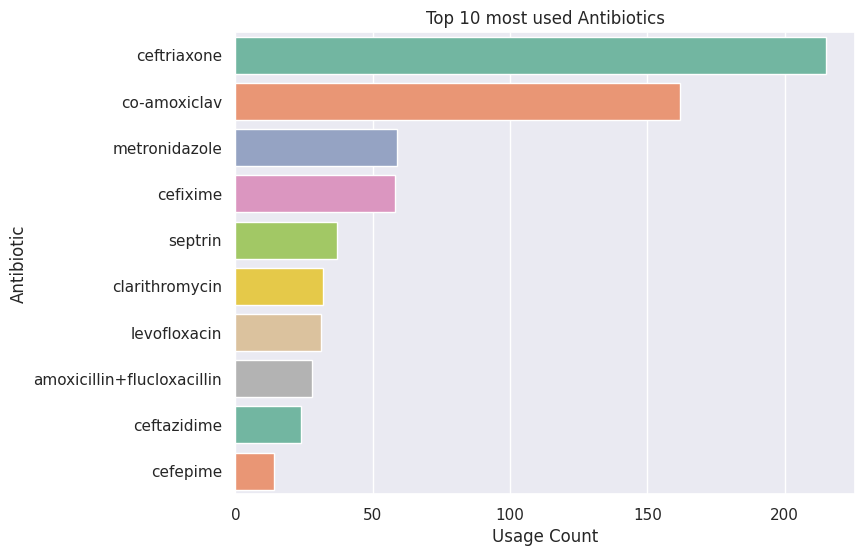

In [106]:
plt.figure(figsize=(8,6))
sns.set(style='darkgrid')
sns.barplot(data=top_10_drug,x='Count',y='Drug',palette='Set2')
plt.xlabel('Usage Count')
plt.ylabel('Antibiotic')
plt.title('Top 10 most used Antibiotics')
plt.show()

In [107]:
data.Gender.value_counts()

Male      448
Female    375
Sex         2
Name: Gender, dtype: int64

In [108]:
data = data[data['Gender'] != 'Sex']

In [109]:
data['Age'] = data['Age'].astype(int)

<ipython-input-109-681e3c86e6ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'] = data['Age'].astype(int)


<ipython-input-110-3aa1748af528>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[1].get_xticklabels())


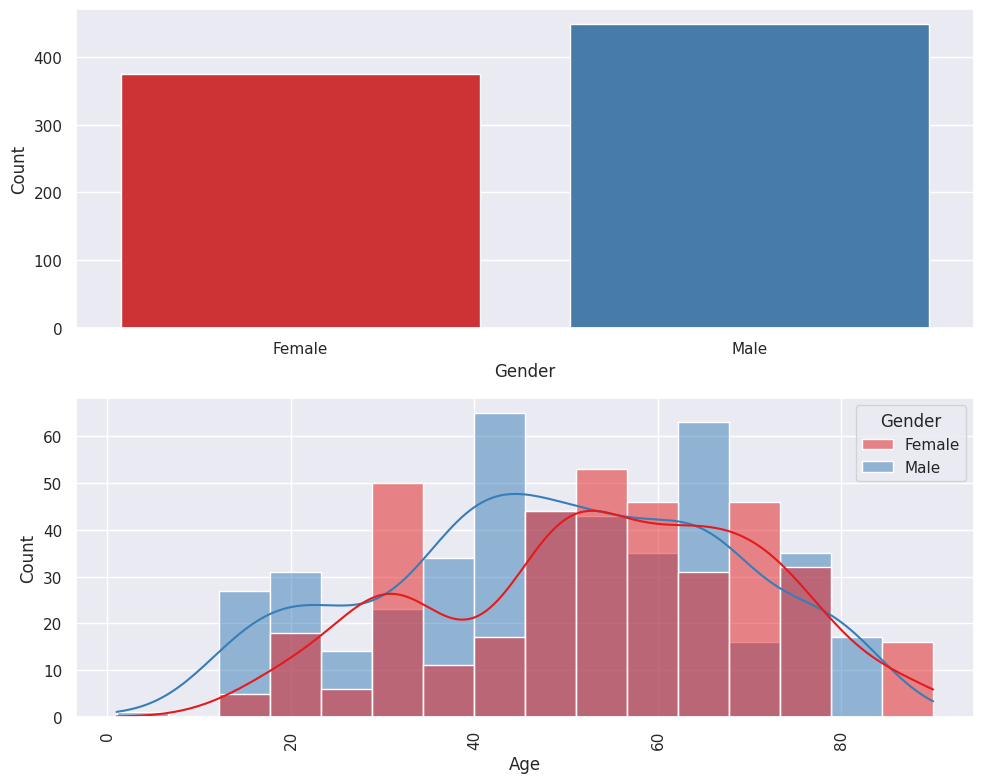

In [110]:
# Age and Gender distribution
fig, axes = plt.subplots(2,1,figsize=(10, 8))

# first subplot - Gender distribution
sns.set(style='darkgrid')
sns.countplot(data=data,x='Gender',palette='Set1',ax=axes[0])
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(axes[0].get_xticklabels())

# second subplot - Age distribution with male-female ratio
age_bins = [20, 30, 40, 50, 60, 70, 80]  # Define your age bins here
data['Age Group'] = pd.cut(data['Age'], bins=age_bins)
sns.set(style='darkgrid')
sns.histplot(data=data,x='Age', hue='Gender', palette='Set1', kde='True', ax=axes[1])
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(axes[1].get_xticklabels())

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

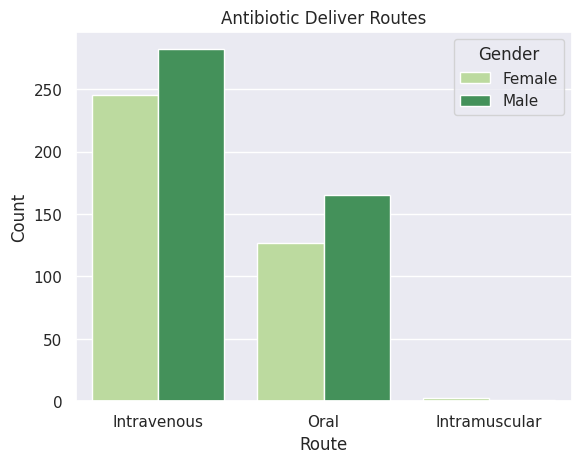

In [121]:
# Drug intake route
sns.set(style='darkgrid')
sns.countplot(data=data,x='Route', hue='Gender', palette='YlGn')
plt.xlabel('Route')
plt.ylabel('Count')
# Change the x-labels
new_labels = ['Intravenous', 'Oral', 'Intramuscular']
plt.xticks(ticks=[0, 1, 2], labels=new_labels)
plt.title('Antibiotic Deliver Routes')
plt.show()

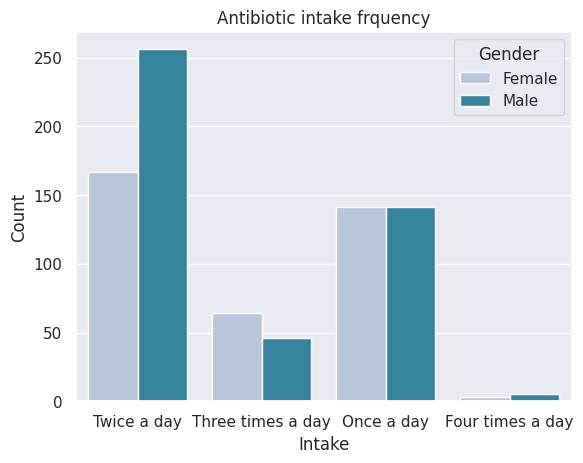

In [123]:
# Drug intake frequency
sns.set(style='darkgrid')
sns.countplot(data=data,x='Frequency', hue='Gender', palette='PuBuGn')
plt.xlabel('Intake')
plt.ylabel('Count')
# Change the x-labels
new_labels = ['Twice a day', 'Three times a day', 'Once a day', 'Four times a day']
plt.xticks(ticks=[0, 1, 2, 3], labels=new_labels)
plt.title('Antibiotic intake frquency')
plt.show()

In [135]:
data['Duration (days)'].dtype

dtype('O')

In [136]:
data['Duration (days)'] = data['Duration (days)'].astype(int)

In [139]:
data['Dosage (gram)'].dtype

dtype('O')

In [141]:
data['Dosage (gram)'] = data['Dosage (gram)'].astype(float)

<ipython-input-147-0438596fd79b>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data_sorted,x='Dosage (gram)', kde=True, bins=10, palette='Set1',ax=axes[0])
<ipython-input-147-0438596fd79b>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels())
<ipython-input-147-0438596fd79b>:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data_sorted2,x='Duration (days)', palette='Set1', kde=True, ax=axes[1])
<ipython-input-147-0438596fd79b>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[1].get_xticklabels())


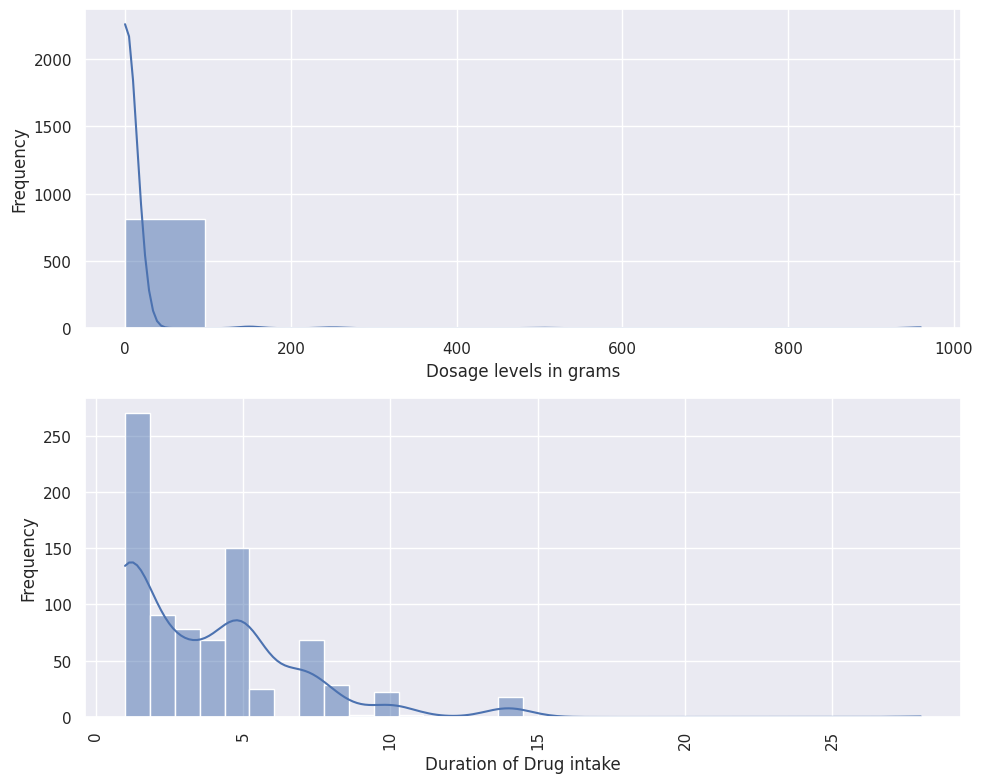

In [147]:
# Dosage (grams) and Duration (days)
fig, axes = plt.subplots(2,1,figsize=(10, 8))

# first subplot - Dosage (grams) distribution
sns.set(style='darkgrid')
data_sorted = data.sort_values(by='Dosage (gram)',ascending=False)
sns.histplot(data=data_sorted,x='Dosage (gram)', kde=True, bins=10, palette='Set1',ax=axes[0])
axes[0].set_xlabel('Dosage levels in grams')
axes[0].set_ylabel('Frequency')
axes[0].set_xticklabels(axes[0].get_xticklabels())

# second subplot - Duration (days) distribution
sns.set(style='darkgrid')
data_sorted2 = data.sort_values(by='Duration (days)',ascending=False)
sns.histplot(data=data_sorted2,x='Duration (days)', palette='Set1', kde=True, ax=axes[1])
axes[1].set_xlabel('Duration of Drug intake')
axes[1].set_ylabel('Frequency')
axes[1].set_xticklabels(axes[1].get_xticklabels())

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [154]:
# Top 10 diagnosis for Antibiotic intake
df = data['Indication'].value_counts().reset_index()[:10]

In [156]:
df.rename(columns={'index':'Diagnosis','Indication':'Count'},inplace=True)

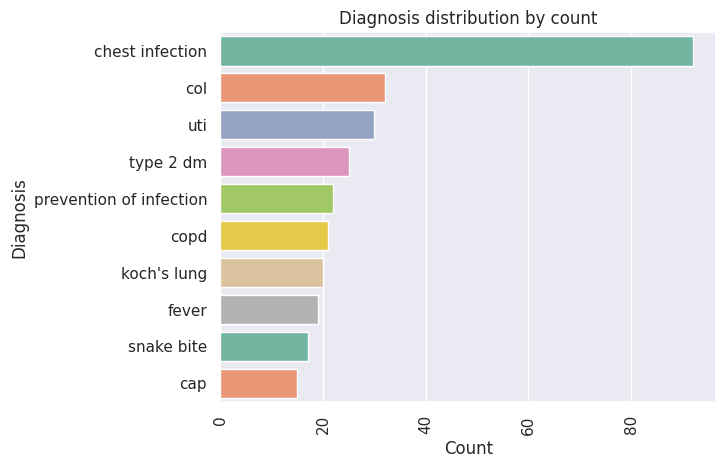

In [159]:
sns.set(style='darkgrid')
sns.barplot(data=df,x='Count',y='Diagnosis',palette='Set2')
plt.xlabel('Count')
plt.xticks(rotation=90)
plt.title('Diagnosis distribution by count')
plt.show()